In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
print("Version of tensorflow is : ", tf.__version__)

Version of tensorflow is :  2.1.0


In [12]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
(train_data , train_label) , (test_data , test_label) = imdb.load_data(num_words = 10000)

In [4]:
print("Details of Training Data :\n==============================")
print("Shape of train_data : ",train_data.shape)
print("Shape of train_label : ",train_label.shape)
print("Details of Testing Data :\n==============================")
print("Shape of test_data : ",test_data.shape)
print("Shape of test_label : ",test_label.shape)

Details of Training Data :
Shape of train_data :  (25000,)
Shape of train_label :  (25000,)
Details of Testing Data :
Shape of test_data :  (25000,)
Shape of test_label :  (25000,)


In [10]:
padding = "post"
truncating = "post"
embedding_dim = 32
maxlen = 10000

In [13]:
X = pad_sequencs(train_data , maxlen = maxlen , padding = padding , truncating = truncating)

In [14]:
X.shape

(25000, 10000)

In [15]:
word_index = imdb.get_word_index()

In [17]:
rev_word_index = dict()
for k , v in word_index.items():
    rev_word_index[v] = k

In [50]:
def build_model(layer):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Embedding(10000 , embedding_dim , input_length = maxlen))
    model.add(tf.keras.layers.GlobalAveragePooling1D()),
    for ly in layer:
        model.add(tf.keras.layers.Dense(ly , activation = "relu"))
    model.add(tf.keras.layers.Dense(1 , activation = "sigmoid"))
    model.compile(optimizer = "rmsprop" , loss = tf.keras.losses.binary_crossentropy , metrics = ['acc'])
    return model

In [51]:
X_train = X[:20000 , :]
y_train = train_label[:20000]
X_test  = X[20000: , :]
y_test  = train_label[20000 : ]

In [52]:
print("Details of Training Data :\n==============================")
print("Shape of X_train : ",X_train.shape)
print("Shape of y_train : ",y_train.shape)
print("Details of Validation Data :\n==============================")
print("Shape of X_test : ",X_test.shape)
print("Shape of y_test : ",y_test.shape)

Details of Training Data :
Shape of X_train :  (20000, 10000)
Shape of y_train :  (20000,)
Details of Validation Data :
Shape of X_test :  (5000, 10000)
Shape of y_test :  (5000,)


In [53]:
model_dict = {}
model_dict["model_512_512"] = {}
model_dict["model_512_512"]['layers'] = [512 , 512]
model_dict["model_256_256"] = {}
model_dict["model_256_256"]['layers'] = [256 , 256]
model_dict["model_256_128"] = {}
model_dict["model_256_128"]['layers'] = [128 , 128]
model_dict["model_64_64"] = {}
model_dict["model_64_64"]['layers'] = [64 , 64]
model_dict["model_4_4"] = {}
model_dict["model_4_4"]['layers'] = [4 , 4]

In [54]:
for key in model_dict:
    model_dict[key]['model'] = build_model(model_dict[key]['layers'])

In [55]:
for key in model_dict:
    model_dict[key]['epochs']     = 20
    model_dict[key]['batch_size'] = 512
    model_dict[key]['history']    = None

In [56]:
for key in model_dict:
    print("Start of model : " + key)
    model_dict[key]['history'] = model_dict[key]['model'].fit(X_train , y_train ,
                                                              epochs = model_dict[key]['epochs'] ,
                                                              batch_size = model_dict[key]['batch_size'] ,
                                                              validation_data = (X_test , y_test)
                                                             )
    print("End of model : " + key)

Start of model : model_512_512
Train on 20000 samples, validate on 5000 samples
Epoch 1/20
20000/20000 [==============================] - 113s 6ms/sample - loss: 0.6933 - acc: 0.5013 - val_loss: 0.6932 - val_acc: 0.4938
Epoch 2/20
20000/20000 [==============================] - 76s 4ms/sample - loss: 0.6932 - acc: 0.4987 - val_loss: 0.6932 - val_acc: 0.4938
Epoch 3/20
20000/20000 [==============================] - 76s 4ms/sample - loss: 0.6932 - acc: 0.5005 - val_loss: 0.6936 - val_acc: 0.4938
Epoch 4/20
20000/20000 [==============================] - 83s 4ms/sample - loss: 0.6932 - acc: 0.5010 - val_loss: 0.6933 - val_acc: 0.4938
Epoch 5/20
20000/20000 [==============================] - 80s 4ms/sample - loss: 0.6932 - acc: 0.5009 - val_loss: 0.6933 - val_acc: 0.4938
Epoch 6/20
20000/20000 [==============================] - 77s 4ms/sample - loss: 0.6932 - acc: 0.4963 - val_loss: 0.6933 - val_acc: 0.4938
Epoch 7/20
20000/20000 [==============================] - 77s 4ms/sample - loss: 0.69

20000/20000 [==============================] - 72s 4ms/sample - loss: 0.5652 - acc: 0.7117 - val_loss: 0.5306 - val_acc: 0.7954
Epoch 18/20
20000/20000 [==============================] - 73s 4ms/sample - loss: 0.5459 - acc: 0.7283 - val_loss: 0.6751 - val_acc: 0.5636
Epoch 19/20
20000/20000 [==============================] - 1532s 77ms/sample - loss: 0.5374 - acc: 0.7246 - val_loss: 0.7273 - val_acc: 0.5514
Epoch 20/20
20000/20000 [==============================] - 78s 4ms/sample - loss: 0.5284 - acc: 0.7347 - val_loss: 0.5962 - val_acc: 0.6194
End of model : model_256_128
Start of model : model_64_64
Train on 20000 samples, validate on 5000 samples
Epoch 1/20
20000/20000 [==============================] - 93s 5ms/sample - loss: 0.6932 - acc: 0.5042 - val_loss: 0.6931 - val_acc: 0.5062
Epoch 2/20
20000/20000 [==============================] - 78s 4ms/sample - loss: 0.6932 - acc: 0.5001 - val_loss: 0.6931 - val_acc: 0.5134
Epoch 3/20
20000/20000 [==============================] - 81s 4m

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")

In [58]:
def plot(history):
    _ , ax = plt.subplots(1,2,figsize = (16,6))
    ax[0].plot(history.history['acc'] , label="Training")
    ax[0].plot(history.history['val_acc'] , label="Validation")
    ax[0].set_title("Acc")
    ax[0].legend()

    ax[1].plot(history.history['loss'] , label="Training")
    ax[1].plot(history.history['val_loss'] , label="Validation")
    ax[1].set_title("Loss")
    ax[1].legend()

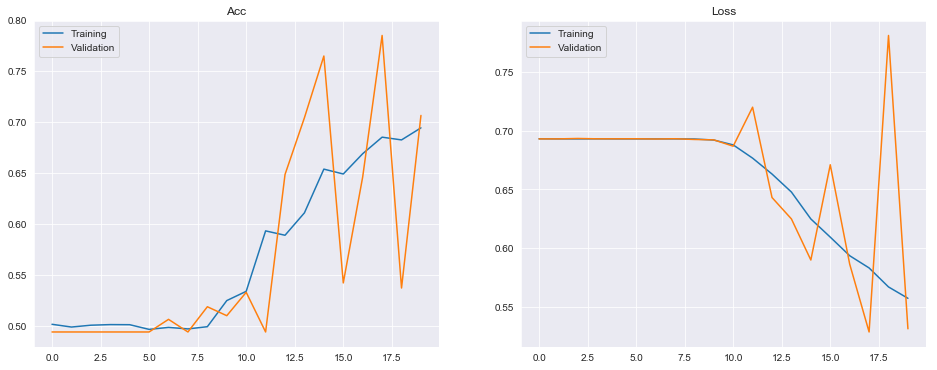

In [59]:
plot(model_dict["model_512_512"]['history'])

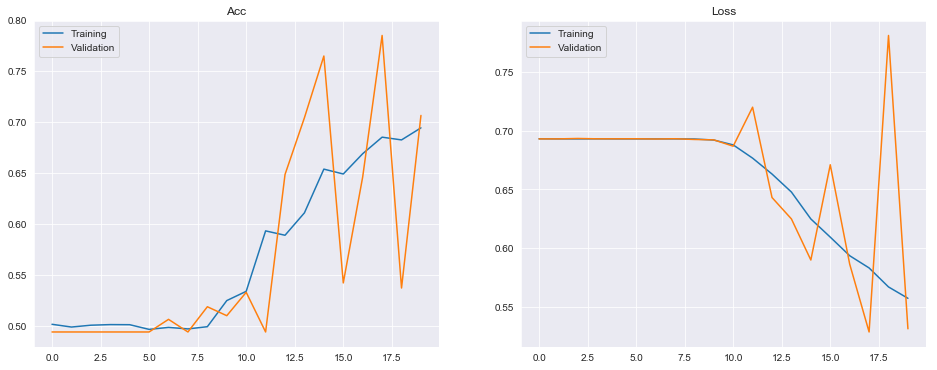

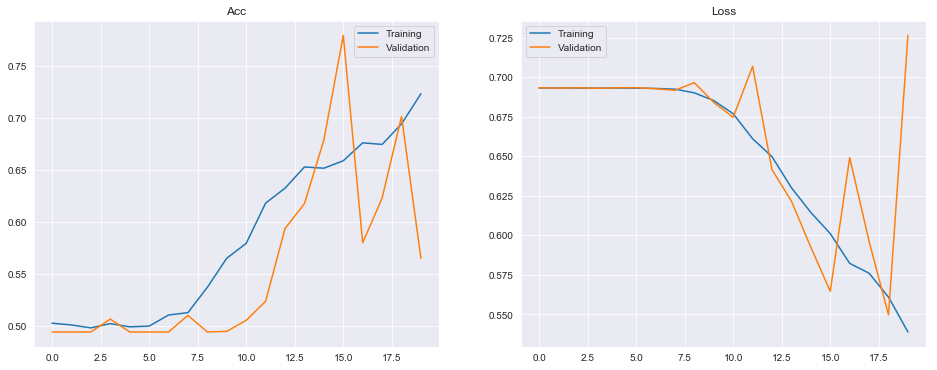

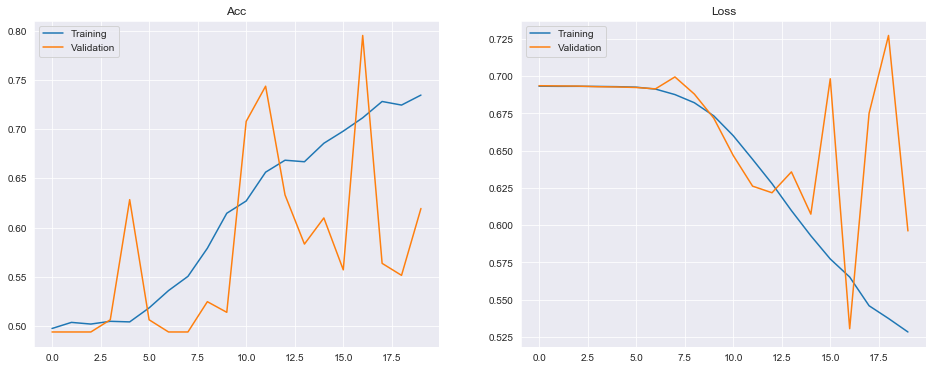

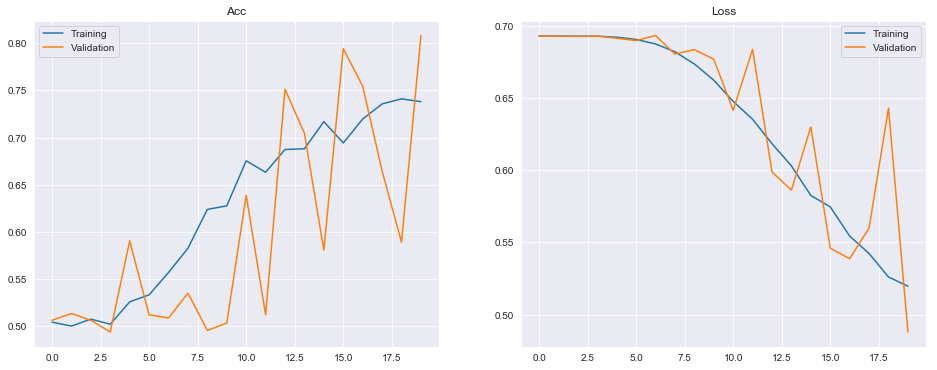

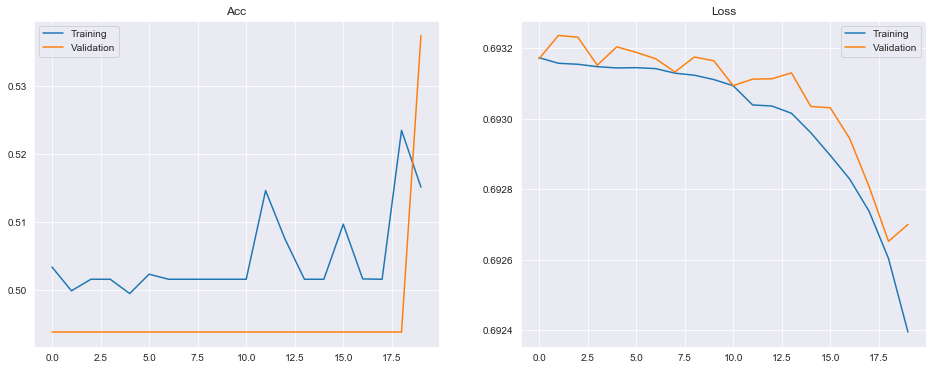

In [60]:
for i in model_dict:
    plot(model_dict[i]['history'])

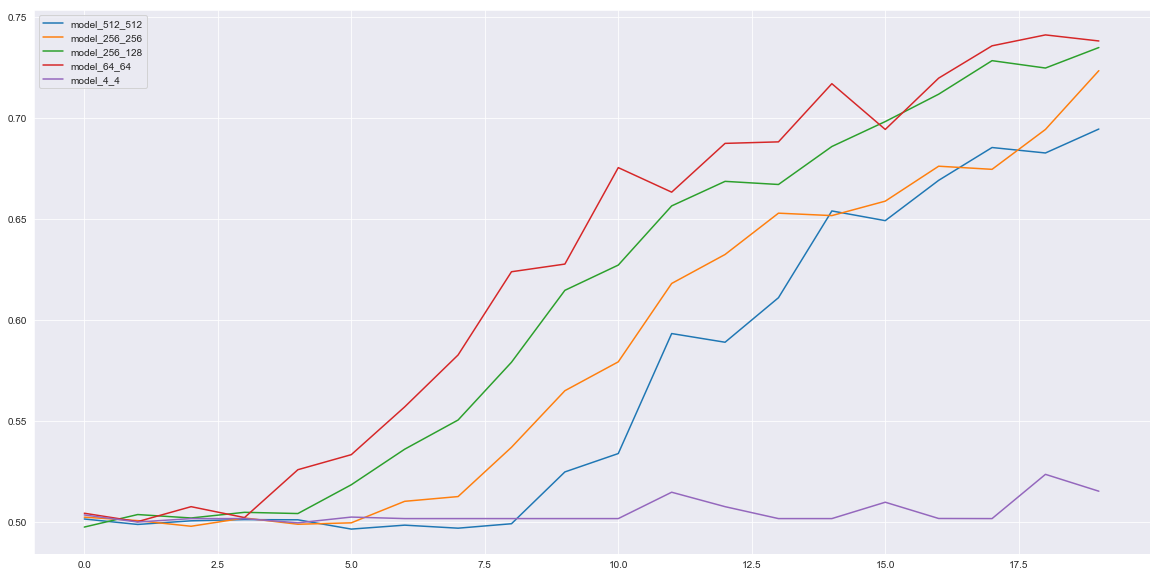

In [61]:
plt.figure(figsize=(20 , 10))
for i in model_dict:
  plt.plot(model_dict[i]['history'].history['acc'] , label = i)
plt.legend()

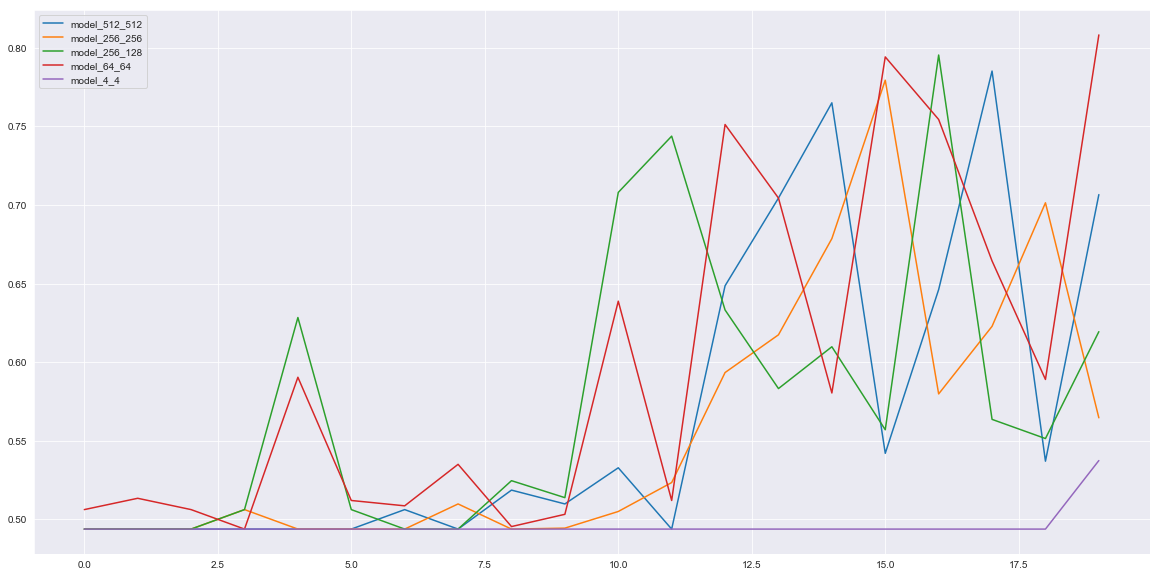

In [62]:
plt.figure(figsize=(20 , 10))
for i in model_dict:
    plt.plot(model_dict[i]['history'].history['val_acc'] , label = i)
plt.legend()

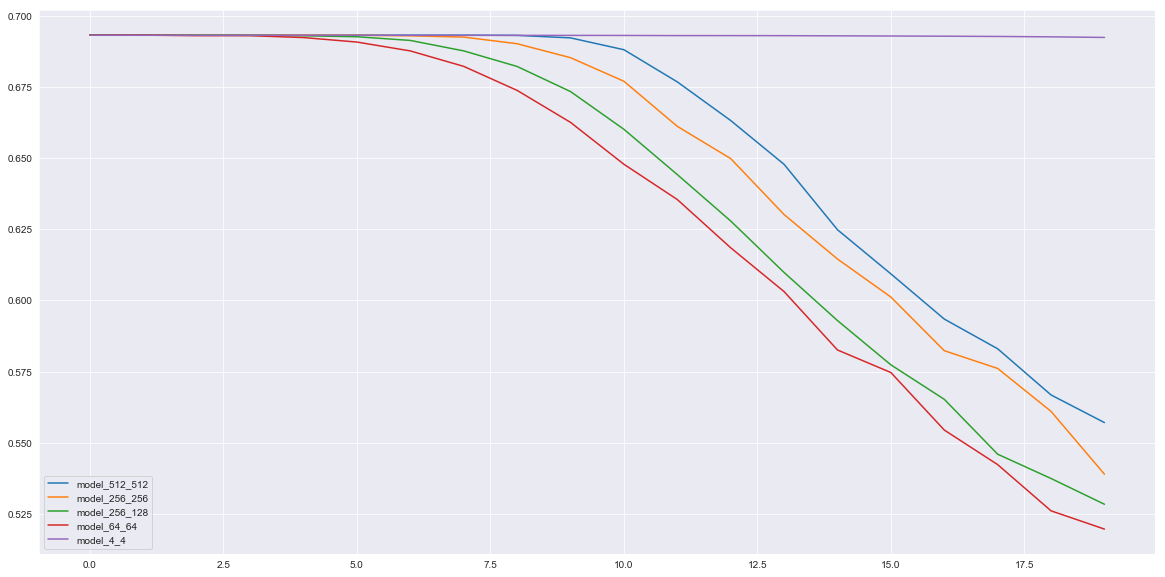

In [63]:
plt.figure(figsize=(20 , 10))
for i in model_dict:
    plt.plot(model_dict[i]['history'].history['loss'] , label = i)
plt.legend()

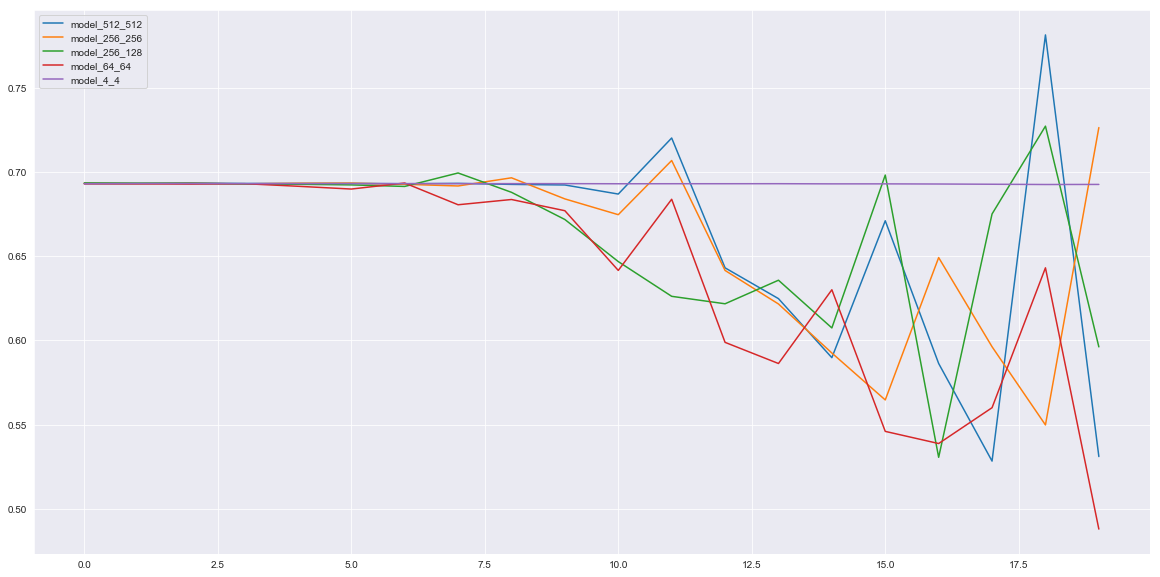

In [64]:
plt.figure(figsize=(20 , 10))
for i in model_dict:
    plt.plot(model_dict[i]['history'].history['val_loss'] , label = i)
plt.legend()